In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 10s 0us/step


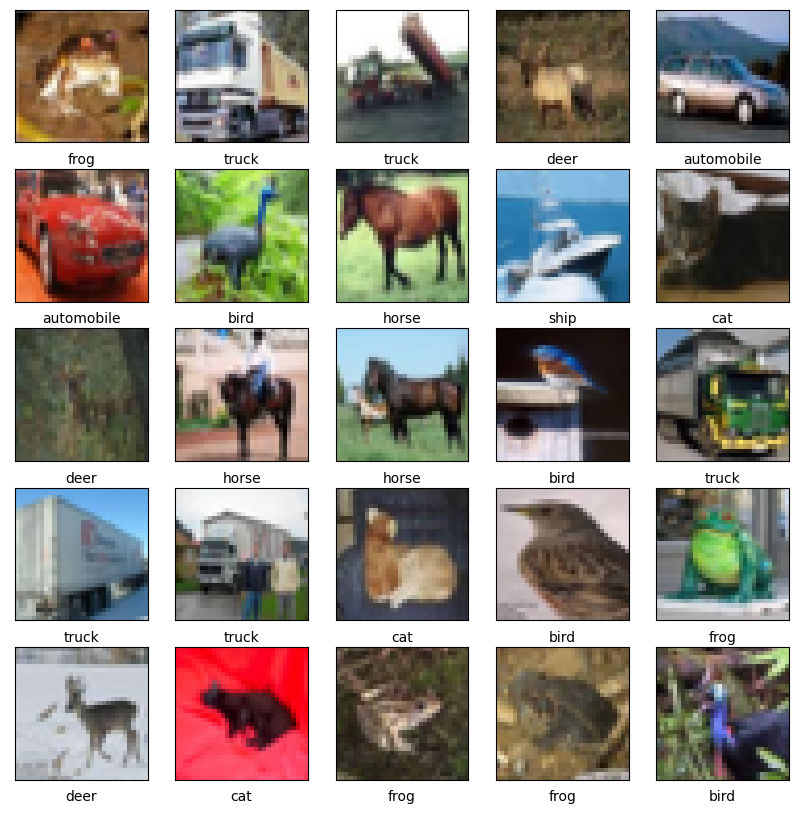

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [42]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.AveragePooling2D(pool_size=(4, 4)))
model.add(layers.Flatten())
model.add(layers.Dense(10))
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 average_pooling2d_22 (Avera  (None, 1, 1, 64)       

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))

Epoch 1/20


2023-10-24 17:32:04.686762: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 0.5400 - accuracy: 0.8089

2023-10-24 17:32:23.964510: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 23s 13ms/step - loss: 0.5400 - accuracy: 0.8089 - val_loss: 0.9505 - val_accuracy: 0.6953
Epoch 2/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.5022 - accuracy: 0.8221 - val_loss: 0.9122 - val_accuracy: 0.7110
Epoch 3/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.4697 - accuracy: 0.8315 - val_loss: 0.9945 - val_accuracy: 0.7091
Epoch 4/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.4409 - accuracy: 0.8413 - val_loss: 1.0437 - val_accuracy: 0.6946
Epoch 5/20
1563/1563 [==============================] - 17s 11ms/step - loss: 0.4083 - accuracy: 0.8538 - val_loss: 1.0682 - val_accuracy: 0.7019
Epoch 6/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.3850 - accuracy: 0.8619 - val_loss: 1.1387 - val_accuracy: 0.6933
Epoch 7/20
1563/1563 [==============================] - 17s 11ms/step - loss: 0.3571 - accuracy: 0.8707 - val_loss: 1.1041 - val_accura

313/313 - 1s - loss: 1.8109 - accuracy: 0.6996 - 1s/epoch - 5ms/step
0.6995999813079834


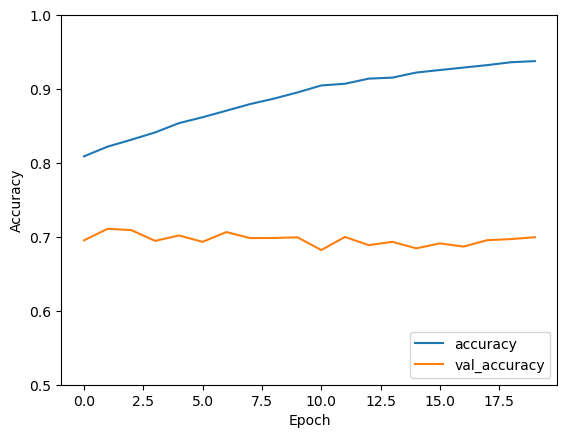

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

In [44]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))

Epoch 1/20


2023-10-24 18:01:32.432672: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 1.4743 - accuracy: 0.4647

2023-10-24 18:01:50.740442: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 22s 12ms/step - loss: 1.4743 - accuracy: 0.4647 - val_loss: 1.4095 - val_accuracy: 0.5083
Epoch 2/20
1563/1563 [==============================] - 16s 10ms/step - loss: 1.3068 - accuracy: 0.5328 - val_loss: 1.2912 - val_accuracy: 0.5394
Epoch 3/20
1563/1563 [==============================] - 16s 10ms/step - loss: 1.2111 - accuracy: 0.5712 - val_loss: 1.1431 - val_accuracy: 0.6029
Epoch 4/20
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1434 - accuracy: 0.5972 - val_loss: 1.1199 - val_accuracy: 0.6071
Epoch 5/20
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0831 - accuracy: 0.6190 - val_loss: 1.0878 - val_accuracy: 0.6130
Epoch 6/20
1563/1563 [==============================] - 18s 11ms/step - loss: 1.0326 - accuracy: 0.6379 - val_loss: 1.0282 - val_accuracy: 0.6432
Epoch 7/20
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9911 - accuracy: 0.6545 - val_loss: 1.0224 - val_accura

313/313 - 1s - loss: 0.8097 - accuracy: 0.7251 - 1s/epoch - 4ms/step
0.7250999808311462


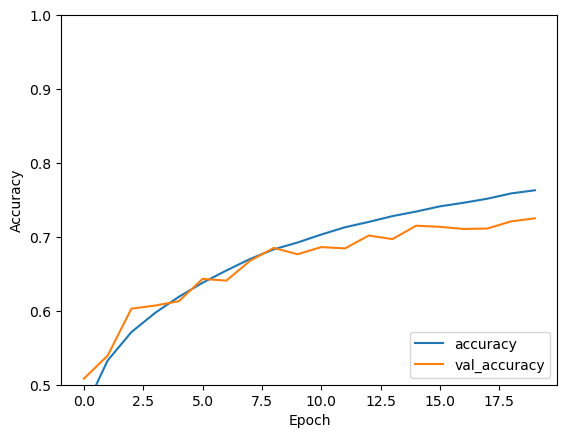

In [45]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

In [100]:
history = model.fit(train_images, train_labels, epochs=100, 
                    validation_data=(test_images, test_labels))

Epoch 1/100
1563/1563 [==============================] - 16s 10ms/step - loss: 0.6711 - accuracy: 0.7674 - val_loss: 0.7931 - val_accuracy: 0.7309
Epoch 2/100
1563/1563 [==============================] - 16s 10ms/step - loss: 0.6613 - accuracy: 0.7703 - val_loss: 0.7878 - val_accuracy: 0.7334
Epoch 3/100
1563/1563 [==============================] - 16s 10ms/step - loss: 0.6477 - accuracy: 0.7753 - val_loss: 0.7988 - val_accuracy: 0.7263
Epoch 4/100
1563/1563 [==============================] - 16s 10ms/step - loss: 0.6371 - accuracy: 0.7774 - val_loss: 0.7911 - val_accuracy: 0.7348
Epoch 5/100
1563/1563 [==============================] - 16s 10ms/step - loss: 0.6250 - accuracy: 0.7839 - val_loss: 0.7853 - val_accuracy: 0.7370
Epoch 6/100
1563/1563 [==============================] - 16s 10ms/step - loss: 0.6130 - accuracy: 0.7869 - val_loss: 0.7833 - val_accuracy: 0.7416
Epoch 7/100
1563/1563 [==============================] - 16s 10ms/step - loss: 0.6071 - accuracy: 0.7893 - val_loss: 0

In [101]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 average_pooling2d_22 (Avera  (None, 1, 1, 64)       

In [102]:
from keras.models import Model
import numpy as np
import scipy as sp

In [103]:
activation_layer = model.get_layer('conv2d_50')
model2 = Model(inputs=model.input, outputs = activation_layer.output)

In [104]:
model2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48_input (InputLayer  [(None, 32, 32, 3)]      0         
 )                                                               
                                                                 
 conv2d_48 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                           

In [105]:
final_dense = model.get_layer('dense_17')
W = final_dense.get_weights()[0]

Image ID =  [1131]
1/1 [==============================] - 0s 16ms/step


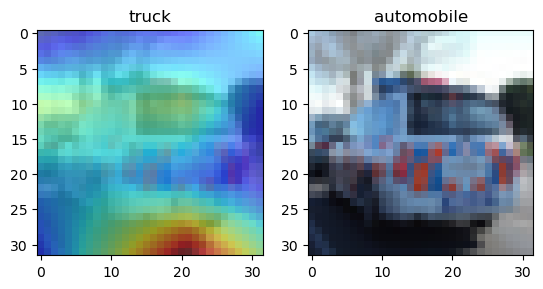

In [131]:
id = np.random.randint(0, test_images.shape[0], 1)
print("Image ID = ", id)
img = np.expand_dims(test_images[id][0], 0)
fmaps = model2.predict(img)[0]

probs = model.predict(img)
pred = np.argmax(probs[0])

w = W[:, pred]

cam = fmaps.dot(w)

cam = sp.ndimage.zoom(cam, (8, 8), order = 1)

plt.subplot(1, 2, 1)
plt.imshow(test_images[id[0]], alpha=0.8)
plt.imshow(cam, cmap='jet', alpha = 0.5)
plt.title(class_names[pred])
plt.subplot(1, 2, 2)
plt.imshow(test_images[id[0]])
plt.title(class_names[test_labels[id[0]][0]])
plt.show()